<a href="https://colab.research.google.com/github/mahbubcsedu/interviewcoding/blob/main/recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# without helper function
def generate_power_set(input_set):

  def backtrack(idx, temp):
      if idx == len(input_set):
         res.append(list(temp))
         return
      # recursion tree has two path, one with the current item picked and another is current item skipped
      backtrack(idx+1, temp)
      temp = temp + [input_set[idx]]
      backtrack(idx + 1, temp)

  res = []
  backtrack(0,[])

  return res


res = generate_power_set(['a','b'])
print(res)


b
a
b
[[], ['b'], ['a'], ['a', 'b']]


The recursion will be easy to visualize if we use smaller input. For input [a,b] the event is as follows
* ds1(0+1, [])  -> []
* ds1(1+1, [])  -> []
* res ->  [[]]
* ds2(1+1, [b])
* res -> [[]]
* res -> [[], ['b']]
* ds2(0+1, a)
* res -> [[], ['b']]
* ds(1+1, a)
* res -> [[], ['b']]
* res -> [[], ['b'], ['a']]
* ds2(1+1, a b)
* res -> [[], ['b'], ['a']]
* res -> [[], ['b'], ['a'], ['a', 'b']]




In [ ]:
import math

def generate_power_set(S):
  power_set = []
  # loop over [0, 2^n-1]
  for int_for_subset in range(1 << len(S)):
    bit_array = int_for_subset
    subset = []
    # print(bit_array)
    while bit_array:
      # print(int(math.log2(bit_array & ~(bit_array-1))))
      subset.append(S[int(math.log2(bit_array & ~(bit_array-1)))])
      bit_array &=bit_array-1
    # print(subset)
    power_set.append(subset)
  return power_set

res= generate_power_set([1,2,3])
print(res, '')

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]] 


In [ ]:
from typing import List
def subsets( nums: List[int]) -> List[List[int]]:
        n = len(nums)
        output = []
        
        # if we have a set of 2, then we need only 2^2 to 2^3 or [4,5,6,7] or only 4 possible subsets. 0 to 2^2-1 those only be represnted by 2 bits [00, 01,10,11]
        for i in range(1 << len(nums)):
            # generate bitmask, from 0..00 to 1..11
            # bin(i) is the binary representation of i
            bitmask = str(bin(i)[2:]).zfill(len(nums))

            # print(i, str(bin(i)[3:]).zfill(len(nums)))
            
            # append subset corresponding to that bitmask
            output.append([nums[j] for j in range(n) if bitmask[j] == '1'])
        
        return output
subsets([1,2,3])

0 000
1 000
2 000
3 001
4 000
5 001
6 010
7 011


[[], [3], [2], [2, 3], [1], [1, 3], [1, 2], [1, 2, 3]]

In [ ]:
# using helper function
def generate_power_set(S):
  
  # print(len(S))
  def helper(start, temp, ps):
    # print(start)
    # if(start==len(S)):
    # print(ps)
    ps.append(list(temp)) # append should be list temp is list and it will append to ps list
    # print(ps)
      # return

    for i in range(start, len(S)):
      temp.append(S[i])
      helper(i+1, temp, ps)
      temp.pop()
  # return 
  ps = []
  helper(0,[], ps)
  return ps
res= generate_power_set(['a','b','c'])
# print(res)
print(sorted(res,key=len))

[[], ['a'], ['a', 'b'], ['a', 'b', 'c'], ['a', 'c'], ['b'], ['b', 'c'], ['c']]
[[], ['a'], ['b'], ['c'], ['a', 'b'], ['a', 'c'], ['b', 'c'], ['a', 'b', 'c']]


In [ ]:
# using helper function
def combination(S, k):
  
  # print(len(S))
  # we can use idx to keep it a pattern instead of giving different name and then get confused about the backtrack
  def helper(start, temp, ps, k):
    # print(start)
    # if(start==len(S)):
    # print(ps)
    if len(temp) == k:
      ps.append(list(temp)) # append should be list temp is list and it will append to ps list
      return

    # print(ps)
      # return

    for i in range(start, len(S)):
      temp.append(S[i])
      helper(i+1, temp, ps, k)
      temp.pop()
  # return 
  ps = []
  helper(0,[], ps, k)
  return ps
res= combination(['a','b','c'], 2)
# print(res)
print(sorted(res,key=len))

[['a', 'b'], ['a', 'c'], ['b', 'c']]


In [ ]:
def combinations(n, k):
    def directed_combinations(offset, partial_combination):
        if len(partial_combination) == k:
            result.append(list(partial_combination))
            return

        # Generate remaining combinations over {offset, ..., n - 1} of size
        # num_remaining.
        num_remaining = k - len(partial_combination)
        i = offset
        while i <= n and num_remaining <= n - i + 1:
            directed_combinations(i + 1, partial_combination + [i])
            i += 1

    result = []
    directed_combinations(1, [])
    return result
print(combinations(4,2))

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


In [ ]:
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        res = []

        def backtrack(start, temp):
            if  len(temp)==k:
                res.append(temp.copy())
                return 
            
            for i in range(start, n+1):
                temp.append(i)
                backtrack(i+1, temp) 
                # make sure, we are using i instead of start here, 
                # otherwise it will go back to 0 after completing full loop
                temp.pop()
            
        backtrack(1,[])
        return res 

# Generate all permutations


In [ ]:
from typing import List 

def allPermutations(nums: List[int]) -> List[List[int]]:
  def backtrack(idx):
    if len(nums)-1 == idx:
      result.append(nums.copy())
      return

    for i in range(idx, len(nums)):
      nums[i], nums[idx] = nums[idx], nums[i]
      backtrack(idx+1)
      nums[i], nums[idx] = nums[idx], nums[i]
  
  result = []
  backtrack(0)
  return result  
all_perms = allPermutations([1,2,4])
print(all_perms)

[[1, 2, 4], [1, 4, 2], [2, 1, 4], [2, 4, 1], [4, 2, 1], [4, 1, 2]]


## Generate permutations that support duplicates
If we draw recursion tree, we can see that for duplicate, a new branch is created every time. 
There are two options
 1. We can calculate the same way and add it to the set, so if it duplicate, it will avoid, but it does not help improving time
 2. We can use counter for duplicate, and only create one branch for duplicate items 

In [ ]:
class Solution:
    def permuteUnique(self, nums: List[int]) -> List[List[int]]:
        res = []
        # counter will create [1,1,2] to {1:2, 2:1}, so, we will have two items instead of three
        # will try to avoid creating duplicate recursion tree with the same elements at first level
        
        ct = collections.Counter(nums)
        def backtrack(perm, counter):
            if len(perm) == len(nums):
                res.append(perm.copy())    
            
            for n in counter:
                if counter[n]==0:
                    continue
                perm.append(n)
                counter[n] -=1
                backtrack(perm, counter)
                counter[n] +=1
                perm.pop()

        backtrack([], ct)
        return res 

## Generate all parenthesis
Follow one pattern to ratain info in your brain

In [ ]:
from typing import List
def generateAllParen(n:int)->List[List[str]]:
  def backtrack(n_left, n_right, pre, res):
    if n_left > 0:
      backtrack(n_left-1, n_right, pre+"(", res)
    if n_left < n_right:
      backtrack(n_left, n_right-1, pre+")", res)

    if not n_right:
      res.append(pre)
    return res
  return backtrack(n,n,"",[])
print(generateAllParen(3))


['((()))', '(()())', '(())()', '()(())', '()()()']


In [ ]:
class Paren:
    def generateParenthesis(self, n: int) -> List[str]:

        def helper(left, right, temp, res):
            if left < right:
                return
            if left==n and right==n: # when reached here, performed n-1 operation and we started from 0,0
                res.append(temp)
            
            if left <= n: # right parent can never be greater than left
                temp+="("
                helper(left+1, right, temp, res)
                temp=temp[:-1]
            if right < left: #just to make equal number
                temp+=")"
                helper(left, right+1, temp, res)
                temp=temp[:-1]
        res=[]
        helper(0,0,"", res)
        return res
        
    def generateParenthesis2(self, n: int) -> List[str]:
        if n==0: return ['']
        res = []
        # started from empty, it generates
        for c in range(n):
            for left in self.generateParenthesis2(c):
                for right in self.generateParenthesis2(n-c-1):
                    res.append("("+left+")"+right)
        return res
    def generateParenthesisdp(self, n: int) -> List[str]:
        dp=[[] for _ in range(n+1)] # for each length, we will store the results
        dp[0].append("") # 0 layer will keep empty

        for i in range(n+1):
            for j in range(i):
                dp[i] += ["(" + left + ")" + right for left in dp[j] for right in dp[i-j-1]]

        return dp[n]


## Palindromic decomposition
- $[a, aba]$ is a decomposition of aaba as well as substring.
- $[aaa,bbb]$ $[aa,aabb, b]$ are two of the decomposition of [aaabbb] 

In [ ]:
#  palindromic decomposition, there could be multiple decomposition of the same string
# palindromic substring is different than number of decomposition
def palindromicDecomposition(s: str)-> List[List[str]]:
  result = []
  def rec_palindromic_decom(idx, temp):
    if idx == len(s):
      result.append(list(temp))
      return
    
    for i in range(idx+1, len(s)+1):
      prefix = s[idx:i]
      if prefix == prefix[::-1]:
        rec_palindromic_decom(i, temp + [prefix])

  rec_palindromic_decom(0,[])
  return result 


res = palindromicDecomposition("aaa")

print(res)


[['a', 'a', 'a'], ['a', 'aa'], ['aa', 'a'], ['aaa']]


## N-Queen problem
Place N-Queens in a chess board
* Brute force analysis is required, its huge cost and  now way someone will accept that solution

In [ ]:
# explanation is very hard,need to spend more time when possible
def n_queens(n):
  result=[]
  col_placement = [0]*n

  def solve_n_queens(row_num):
    if row_num==n:
      result.append(list(col_placement))
      return
    for col in range(n):
      
      if all( abs(c-col) not in (0, row_num-i) 
      for i, c in enumerate(col_placement[:row_num])):
        col_placement[row_num] = col
        solve_n_queens(row_num+1)
  solve_n_queens(0)
  return result

print(n_queens(4))

[[1, 3, 0, 2], [2, 0, 3, 1]]


This backtracking is more aligned to LeetCode [video explanation](https://www.google.com/search?q=n-queens&rlz=1C5CHFA_enUS878US878&oq=n-queens&aqs=chrome..69i57j0i512l4j69i60l3.3585j0j4&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:46074d7b,vid:Ph95IHmRp5M)

### main concept:
* r-c = is equal for all negative diagola position
* r+c is equal for all positive diagonal position


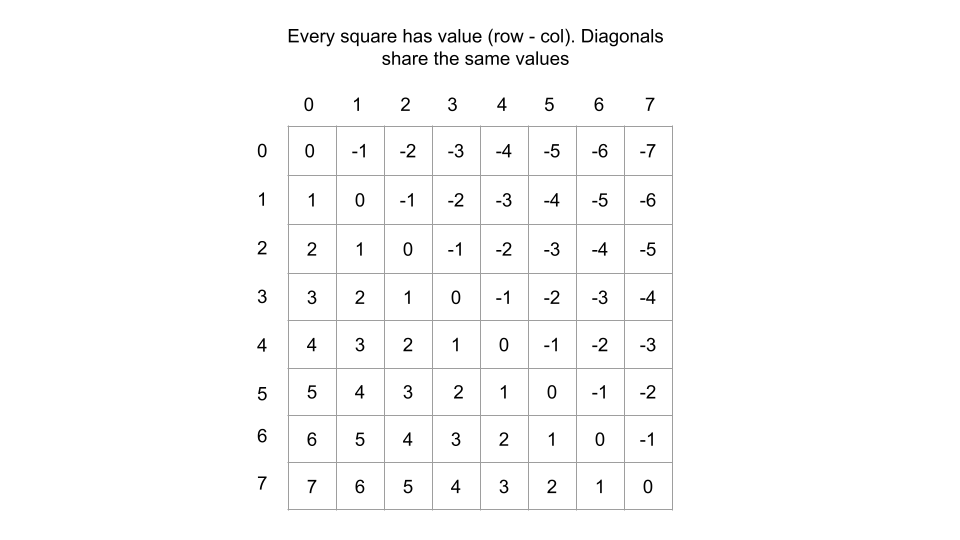

positive diagonal r+c 
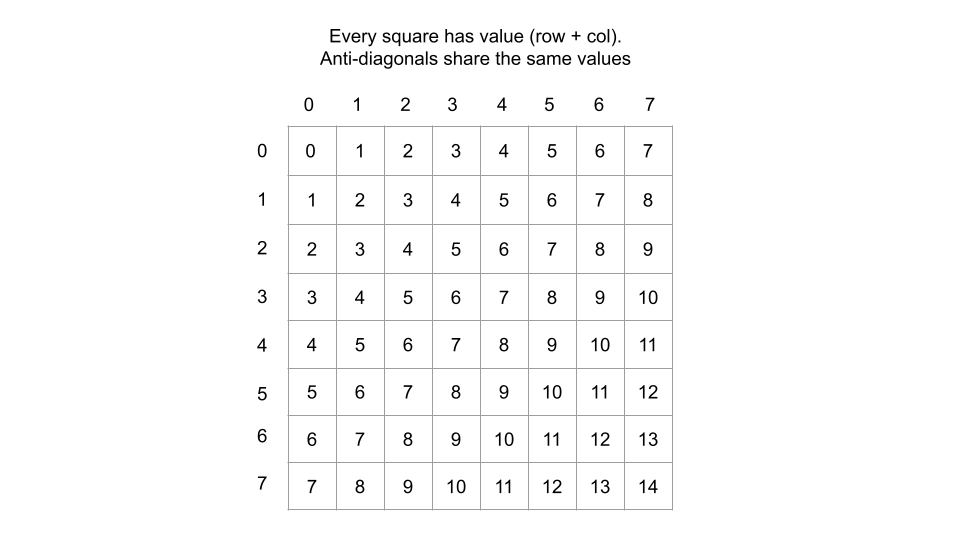

In [ ]:
from IPython.utils.py3compat import platform
def n_queens(n):
  result=[]
  col = set()
  pos_dig=set() # (r-c)
  neg_dia = set() # (r+c)

  board = [["."]*n for i in range(n)]
  

  def solve_n_queens(r):
    if r==n:
      copy = ["".join(row) for row in board]
      # print(col)
      result.append(copy)
      return
    for c in range(n):
      if c not in col and (r+c) not in pos_dig and (r-c) not in neg_dia:
        # continue 
        col.add(c)
        pos_dig.add(r+c)
        neg_dia.add(r-c)
        board[r][c]='Q'

        solve_n_queens(r+1)

        col.remove(c)
        pos_dig.remove(r+c)
        neg_dia.remove(r-c)
        board[r][c]='.'

  solve_n_queens(0)
  return result


print(n_queens(4))

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]


## Suduko solver
- solve region 
- solve global


In [ ]:
import itertools
import math
partial_assignment = [[0, 2, 6, 0, 0, 0, 8, 1, 0], \
         [3, 0, 0, 7, 0, 8, 0, 0, 6], \
         [4, 0, 0, 0, 5, 0, 0, 0, 7], \
         [0, 5, 0, 1, 0, 7, 0, 9, 0],\
         [0, 0, 3, 9, 0, 5, 1, 0, 0], \
         [0, 4, 0, 3, 0, 2, 0, 5, 0],\
         [1, 0, 0, 0, 3, 0, 0, 0, 2], \
         [5, 0, 0, 2, 0, 4, 0, 0, 9],\
         [0, 3, 8, 0, 0, 0, 4, 6, 0]]

# return a row  
# print(partial_assignment[1])

# iterate a whole column
# for k in range(len(partial_assignment)):
#   print(partial_assignment[k][1])

def suduko_solver(partial_assignment):
  EMPTY_ENTRY = 0
  region_size = int(math.sqrt(len(partial_assignment)))

  def solve_partial_sudoku(i,j):
    if i==len(partial_assignment):
      i = 0
      j=j+1
      if j == len(partial_assignment):
        return True
      
    # we don't need to check if its not empty, as we cannot alter those, 
    # so, we will check next position 
    if partial_assignment[i][j] != EMPTY_ENTRY:
      return solve_partial_sudoku(i+1,j)
    
    # we are checking without adding val to (i,j)
    def valid_to_add(i,j,val):
      # check whole column j
      if any(val==partial_assignment[k][j] for k in range(len(partial_assignment))):
        return False
      # check row i
      if val in partial_assignment[i]:
        return False 
      # region check
      
      I=i//region_size #i, j value could be (0,9) but region (0,2)(3,5)(6,8)
      J=j//region_size

      return not any (
          val == partial_assignment[region_size*I+a][region_size*J+b] 
          for a, b in itertools.product(range(region_size), repeat=2)
      )

    # will try to add [1 to 9] value to the empty position
    for val in range(1, len(partial_assignment) + 1):
      # print("checking", i, j)
      if valid_to_add(i,j, val):
        partial_assignment[i][j]=val
        if solve_partial_sudoku(i+1,j):
          return True

    partial_assignment[i][j] = EMPTY_ENTRY
    return False 
  
  return solve_partial_sudoku(0,0)

res = suduko_solver(partial_assignment)
print(res)

True


In [ ]:
import collections
class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        #we can create three set or dictionary to keep items for row, column and boxes or zone
        # we can use a queue/list to store those cell that need to process 

        # we startd by popleft of the queue if it is valid, otherwise 
        rows, cols, zones = collections.defaultdict(set), collections.defaultdict(set), collections.defaultdict(set)
        q=[]
        allowed_vals = [str(i) for i in range(1,10)]

        # fill the list q with empty cells locations as we need to fill those 

        for r in range(len(board)):
            for c in range(len(board[0])):
                if (v := board[r][c]) == '.':
                    q.append((r,c))
                else:
                    rows[r].add(v)
                    cols[c].add(v)
                    zones[(r//3,c//3)].add(v)
        
        def dfs():
            if not q:
                return True 
            
            r, c = q.pop()
            z = (r//3, c//3)

            for v in allowed_vals:
                if v not in cols[c] and v not in rows[r] and v not in zones[z]:
                    board[r][c] = v
                    rows[r].add(v)
                    cols[c].add(v)
                    zones[z].add(v)

                    if dfs():
                        return True 
                    
                    board[r][c]='.'
                    rows[r].discard(v)
                    cols[c].discard(v)
                    zones[z].discard(v)
            q.append((r,c))
            return False 
        
        dfs()

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


## Gray code


In [ ]:
# grey code backtracking solution
def grey_code(num_bits):
  def directed_gray_code(history):
    def differs_by_one(x,y):
      bit_diff= x^y
      return bit_diff and not (bit_diff & (bit_diff-1))


    if len(result) == 1 << num_bits:
        return differs_by_one(result[0], result[-1]) # check cyclic
      
    for i in range(num_bits):
        prev_code = result[-1]
        # generate next candidate by flipping one position starting from LSB
        # 1, 10, 100 xored with previous value
        next_candidate_code = prev_code ^ (1<<i)
        print(history)
        if next_candidate_code not in history:
          history.add(next_candidate_code)
          result.append(next_candidate_code)
          if directed_gray_code(history):
            return True 
          history.remove(next_candidate_code)
          del result[-1]
    return False 
  
  result=[0]
  directed_gray_code(set([0]))
  return result

print(grey_code(3))

{0}
{0, 1}
{0, 1}
{0, 1, 3}
{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3, 6}
{0, 1, 2, 3, 6, 7}
{0, 1, 2, 3, 6, 7}
{0, 1, 2, 3, 5, 6, 7}
[0, 1, 3, 2, 6, 7, 5, 4]


## Bit different by one
3=11, 4=100
3^4= 011 XOR 100 =111=7-1=6=110 & 111=001 
100^111 =011  

In [ ]:
def differ_by_one_place(x, y):
  print(bin(x), bin(y))
  bit_diff = x ^ y
  print(bit_diff, bit_diff-1, not (bit_diff & (bit_diff-1)))
  return bit_diff and not (bit_diff & (bit_diff-1))

print(differ_by_one_place(3,4))
print(differ_by_one_place(3,2))

def generate_next_candidate(candidate, size):
  print(bin(candidate)[3:])
  next_candidate = candidate ^ (1 << size)
  print(bin(next_candidate))
  print(next_candidate)

generate_next_candidate(3,3)
generate_next_candidate(4,3)

0b11 0b100
7 6 False
False
0b11 0b10
1 0 True
True
1
0b1011
11
00
0b1100
12


In [ ]:
# Grey code analytical solution
def grey_code(num_bits):
  if num_bits ==0:
    return [0]
  grey_code_num_of_bit_minus_1 = grey_code(num_bits-1)
  print("step result", grey_code_num_of_bit_minus_1)
  leading_bit_1 = 1 << (num_bits-1)
  print(bin(leading_bit_1))
  return grey_code_num_of_bit_minus_1 + [leading_bit_1 | i for i in reversed(grey_code_num_of_bit_minus_1)]
print(grey_code(3))

step result [0]
0b1
step result [0, 1]
0b10
step result [0, 1, 3, 2]
0b100
[0, 1, 3, 2, 6, 7, 5, 4]


# Grey code (best solution)

In [ ]:
class Solution:
    def grayCode(self, n: int) -> List[int]:
        l = 1 << n
        res=[]
        for i in range(l):
            num = i ^ i >> 1
            print(bin(i), bin(num))
            res.append(num)
        return res

In [ ]:
class BTN:
  def __init__(self,val, left, right):
    self.val = val
    self.left = left
    self.right = right

def generate_all_binary_tree(num_nodes):
  if num_nodes==0:
    return [None]
  result = []
  for num_of_left_nodes in range(num_nodes):
    num_right_tree_nodes = num_nodes -1 - num_of_left_nodes
    left_subtree = generate_all_binary_tree(num_of_left_nodes)
    right_subtree = generate_all_binary_tree(num_right_tree_nodes)
    result += [
        BTN(0, left, right) 
        for left in left_subtree for right in right_subtree
        ]
  return result 
res = generate_all_binary_tree(3)
print(len(res))

5


## Letter combination of numbers

In [ ]:
class Solution:
        def letterCombinations(self, digits: str) -> List[str]:
            digToChar = {
                '2' : "abc",
                '3' : "def",
                '4' : "ghi",
                '5' : "jkl",
                '6' : "mno",
                '7' : "pqrs",
                '8' : "tuv",
                '9' : "wxyz"
            }

            if not digits:
                return []
            res = []
            def backtrack(i, curStr):
                if len(digits) == len(curStr):
                    res.append(''.join(curStr))
                    return
                #concept is to run the twich, get the string and for eac char, do that operation
                for c in digToChar[digits[i]]:
                        curStr+=c
                        backtrack(i+1, curStr)
                        curStr=curStr[:-1]
            
            backtrack(0, "")
            return res 

## Morse code encoder and decoder


In [1]:
encode_table = {
    "A": ".-",
    "B": "-...",
    "C": "-.-.",
    "D": "-..",
    "E": ".",
    "F": "..-.",
    "G": "--.",
    "H": "....",
    "I": "..",
    "J": ".---",
    "K": "-.-",
    "L": ".-..",
    "M": "--",
    "N": "-.",
    "O": "---",
    "P": ".--.",
    "Q": "--.-",
    "R": ".-.",
    "S": "...",
    "T": "-",
    "U": "..-",
    "V": "...-",
    "W": ".--",
    "X": "-..-",
    "Y": "-.--",
    "Z": "--..",
    "0": "-----",
    "1": ".----",
    "2": "..---",
    "3": "...--",
    "4": "....-",
    "5": ".....",
    "6": "-....",
    "7": "--...",
    "8": "---..",
    "9": "----.",
    ".": ".-.-.-",
    ",": "--..--",
    "?": "..--..",
    " ": "SPACE",
}

# Reverse of encode_table.
decode_table = {v: k for k, v in encode_table.items()}

def encode(s):
    enc = " ".join(encode_table[x] for x in s)
    return enc.replace(" SPACE ", "   ")

def decode(encoded):
    symbols = encoded.replace("   ", " SPACE ").split(" ")
    return "".join(decode_table[x] for x in symbols)

print(encode("HEY JUDE"))
print(decode(".... . -.--   .--- ..- -.. ."))

# what if the code is not spaced seperated

.... . -.--   .--- ..- -.. .
HEY JUDE


## Combination sum II ( repeated support)

In [ ]:
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        res=[]
        candidates.sort()
        counter = collections.Counter(candidates)

        def backtrack(cur_pos, cnt, temp, t):
            if t==0:
                res.append(temp.copy())
                return
            elif t < 0:
                return 
            

            for next_cur in range(cur_pos, len(candidates)):
                if cnt[candidates[next_cur]] ==0:
                    continue
                
                temp.append(candidates[next_cur])
                cnt[candidates[next_cur]] -=1
                backtrack(next_cur+1, cnt, temp, t-candidates[next_cur])
                temp.pop()
                cnt[candidates[next_cur]] +=1
        backtrack(0,counter,[],target)    
        return res

## all path source to dest (graph problem mainly)

In [ ]:
# a simple dfs or backtrack
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        g = collections.defaultdict(list)
        
        for i in range(len(graph)):
                g[i] += graph[i]
        
        
        path = [0]
        res=[]
        # q = collections.deque([0])
        dest = len(graph)-1
        
        def backtrack(node):
            if node == dest:
                res.append(list(path))
                return
            
            for next_node in g[node]:
                path.append(next_node)
                backtrack(next_node)
                path.remove(next_node)
        backtrack(0)
        return res